In [1]:
# Import standard libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import random 
import numpy.random as rand
from random import randrange
from scipy.stats import bernoulli, binom
import seaborn as sns
from scipy import stats 
import cdt
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *

/Users/mawuliagamah/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


# 1 - Load data sets 

In [2]:
'''
Load all datasets.
nsw = Male sub sample of treated and control units as used by Lalonde (1986).
nswre74  = Further subsample extracted by Dehejia and Wahba (1999) which includes information on earnings in 1974 (re74)

cps1 = full Current Population Survey dataset
cps2 , cps3 and cps4 are further subsamples exctracted by lalonde to with distributions which better match the nsw treated group.

psid1 = full Panel Study of Income Dynamics dataset
psid2,psid3,psid4 are again subsamples extracted by Lalonde 

'''
# experimental data 

nsw = pd.read_stata("/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/nsw.dta")
nsw.drop('data_id', axis=1, inplace=True)

nswre74_control = pd.read_excel('/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/nswre74_control.xls')
nswre74_treated = pd.read_excel('/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/nswre74_treated.xlsx')
nswre74 = pd.concat([nswre74_control,nswre74_treated]) #Combine treatment into a single control as pandas dataframe

# non experimental data (cps)
cps1 = pd.read_stata("/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/cps_controls.dta")
cps1.drop('data_id', axis=1, inplace=True)
cps2 = pd.read_stata("/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/cps_controls2.dta")
cps3 = pd.read_stata("/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/cps_controls3.dta")
#load non experimental data (psid)
psid1 = pd.read_stata("/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/psid_controls.dta")
psid2 = pd.read_stata("/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/psid_controls2.dta")
psid3 = pd.read_stata("/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/psid_controls3.dta")
cps1['treat'] == 0 # created treated column

cps1

,treat,age,education,black,hispanic,married,nodegree,re74,re75,re78
0,0.0,45.0,11.0,0.0,0.0,1.0,1.0,21516.669922,25243.550781,25564.669922
1,0.0,21.0,14.0,0.0,0.0,0.0,0.0,3175.970947,5852.564941,13496.080078
2,0.0,38.0,12.0,0.0,0.0,1.0,0.0,23039.019531,25130.759766,25564.669922
3,0.0,48.0,6.0,0.0,0.0,1.0,1.0,24994.369141,25243.550781,25564.669922
4,0.0,18.0,8.0,0.0,0.0,1.0,1.0,1669.295044,10727.610352,9860.869141
...,...,...,...,...,...,...,...,...,...,...
15987,0.0,22.0,12.0,1.0,0.0,0.0,0.0,3975.352051,6801.435059,2757.437988
15988,0.0,20.0,12.0,1.0,0.0,1.0,0.0,1445.938965,11832.240234,6895.071777
15989,0.0,37.0,12.0,0.0,0.0,0.0,0.0,1733.951050,1559.370972,4221.865234
15990,0.0,47.0,9.0,0.0,0.0,1.0,1.0,16914.349609,11384.660156,13671.929688


In [3]:
"""
Convert wages to floating point numbers and round 
"""

nsw[['re75','re78']] = nsw[['re75','re78']].astype(float)
nsw[['re75','re78']] = round(nsw[['re75','re78']],0)

nswre74[['re74','re75','re78']] = nswre74[['re74','re75','re78']].astype(float)
nswre74[['re74','re75','re78']]= round(nswre74[['re74','re75','re78']],0)

cps1[['re74','re75','re78']] = cps1[['re74','re75','re78']].astype(float)
cps1[['re74','re75','re78']]= round(cps1[['re74','re75','re78']],0)

psid1[['re74','re75','re78']] = psid1[['re74','re75','re78']].astype(float)
psid1[['re74','re75','re78']]= round(cps1[['re74','re75','re78']],0)

#for i in cols:
  #if(i in nsw.columns):
    #take natural logarithm of wages
    #nsw[i].replace(to_replace = 0, value = 1 , inplace=True)
    #nsw[i]  = np.log(nsw[i])
    #round wages to two decimal places  
    #nsw[i] = round(nsw[i],2)
    

#for i in nsw.columns:
    #take natural logarithm of wages
    #nsw[i].replace(to_replace = 0, value = 1 , inplace=True)
    #nsw[i]  = np.log(nsw[i])
    #round wages to two decimal places  
    #nsw[i] = round(nsw[i],2)    

# Generate index columns 
#nswre74['idx'] = range(1, len(nswre74) + 1)
nsw

,treat,age,education,black,hispanic,married,nodegree,re75,re78
0,1,37,11,1,0,1,1,0.0,9930.0
1,1,22,9,0,1,0,1,0.0,3596.0
2,1,30,12,1,0,0,0,0.0,24909.0
3,1,27,11,1,0,0,1,0.0,7506.0
4,1,33,8,1,0,0,1,0.0,290.0
...,...,...,...,...,...,...,...,...,...
717,0,20,10,1,0,0,1,825.0,0.0
718,0,17,9,0,1,0,1,0.0,5115.0
719,0,17,9,1,0,0,1,1206.0,0.0
720,0,19,11,1,0,0,1,0.0,0.0


# Exploratory Analysis

In [5]:
# Helper functions for plotting

def quick_plot_2(dataset,variable,variable2,variable3):
  plt.figure(figsize=(15,8))
  #Density plots for treatment and control
  sns.kdeplot(dataset=dataset[variable][(dataset[variable2]==0) & (nsw[variable3]==1)])
  sns.kdeplot(dataset=dataset[variable][(dataset[variable2]==1) & (nsw[variable3]==0)])
  sns.kdeplot(dataset=dataset[variable][(dataset[variable2]==0) & (nsw[variable3]==0)])
  return 

def quick_mean_sd(dataset):
  nsw_teatment_subsample = dataset[dataset['treat']==1]
  nsw_control_subsample = dataset[dataset['treat']==0]
  treatment_subsample_mean_sd = nsw_teatment_subsample.describe().loc[['mean','std']].T
  control_subsample_mean_sd = nsw_control_subsample.describe().loc[['mean','std']].T
  treat_control_comparison = pd.concat([treatment_subsample_mean_sd, control_subsample_mean_sd], axis=1)
  superlables = {'treated':['mean','sd'],'control':['mean','sd']}
  treat_control_comparison.columns = pd.MultiIndex.from_frame(pd.DataFrame(superlables).melt())
  return print(treat_control_comparison)
  
def quick_plot(dataset,var1,var2):
  plt.figure(figsize=(15,8))
  #Density plots for treatment and control
  g1 = sns.kdeplot(data=dataset[var1][dataset[var2]==1],color = 'firebrick',label= str(var2)+'_1')
  g1 = sns.kdeplot(data=dataset[var1][dataset[var2]==0],color = 'forestgreen',label= str(var2)+'_0')
  plt.legend(fontsize=15)
  return 


<p> Descriptive statistics for datasets </p>

In [68]:
print(nsw[nsw['treat']==1].describe())
print(nsw[nsw['treat']==0].describe())

       treat         age   education       black    hispanic     married  \
count  297.0  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     1.0   24.626263   10.380471    0.801347    0.094276    0.168350   
std      0.0    6.686391    1.817712    0.399660    0.292706    0.374808   
min      1.0   17.000000    4.000000    0.000000    0.000000    0.000000   
25%      1.0   20.000000    9.000000    1.000000    0.000000    0.000000   
50%      1.0   23.000000   11.000000    1.000000    0.000000    0.000000   
75%      1.0   27.000000   12.000000    1.000000    0.000000    0.000000   
max      1.0   49.000000   16.000000    1.000000    1.000000    1.000000   

         nodegree          re75          re78  
count  297.000000    297.000000    297.000000  
mean     0.730640   3066.121212   5976.383838  
std      0.444376   4874.915386   6923.788384  
min      0.000000      0.000000      0.000000  
25%      0.000000      0.000000    549.000000  
50%      1.000000   1117.00

In [12]:
nswre74[nswre74['treat']==0].describe()

,treat,age,education,black,hispanic,married,nodegree,re74,re75,re78
count,260.0,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,0.0,25.053846,10.088462,0.826923,0.107692,0.153846,0.834615,2107.007692,1266.907692,4554.823077
std,0.0,7.057745,1.614325,0.379043,0.310589,0.361497,0.372244,5687.884124,3102.968892,5483.837112
min,0.0,17.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,19.000000,9.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.0,24.000000,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3139.000000
75%,0.0,28.000000,11.000000,1.000000,0.000000,0.000000,1.000000,139.500000,650.000000,7288.000000
max,0.0,55.000000,14.000000,1.000000,1.000000,1.000000,1.000000,39571.000000,23032.000000,39484.000000


<p> Taking logs of wage reveals that the distribution is bimodal </p>
<p> There are a group of low wage earners (o mode) and higher wave earns (c8 mode) </p>
<p> Treatment decreases amount of low wage earns, increases amount of high wave earners</p>

### Outlier detection

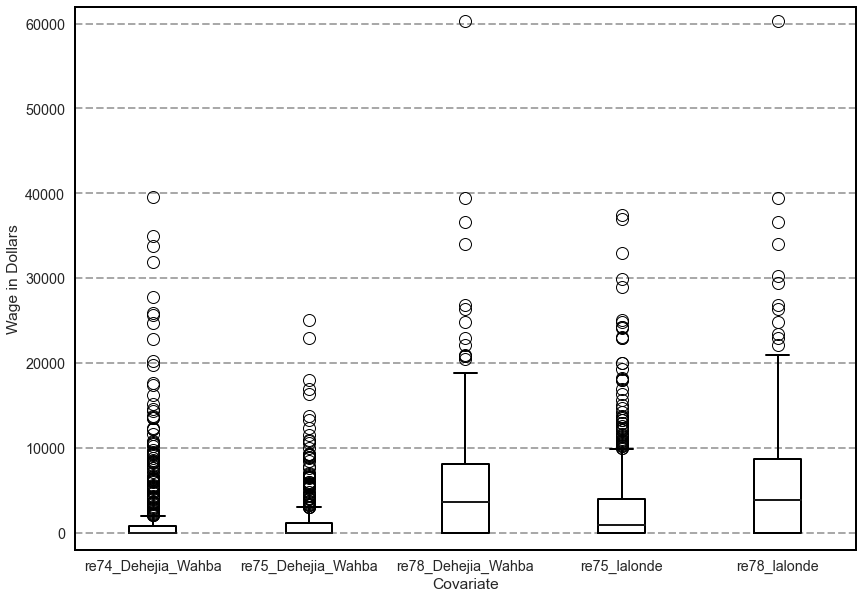

In [117]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.set_facecolor('white')
# Set boarder colour 
for spine in ax.spines:
    ax.spines[spine].set_color('black')
    ax.spines[spine].set_linewidth(2)

ax.grid(color='darkgrey', axis='y', linestyle='--', linewidth=2, alpha=1)

# Cusotmise median line 
medianprops = dict(linestyle='-', linewidth = 2, color='k')
boxprops = dict(linewidth = 2)
whiskerprops = dict(linewidth = 2)
capprops = dict(linewidth = 2)

flierprops = {'marker': 'o', 'markersize': 12,'linewidth':2}

wage74_dej = nswre74['re74']
wage75_dej = nswre74['re75']
wage78_dej = nswre74['re78']

wage75_lalonde = nsw['re75']
wage78_lalonde = nsw['re78']

ax.boxplot([wage74_dej,wage75_dej,wage78_dej,wage75_lalonde,wage78_lalonde],
            medianprops=medianprops,
            boxprops = boxprops,
            whiskerprops=whiskerprops,
            capprops = capprops ,
            flierprops = flierprops,
            widths=0.3) 

ax.set_xlim(0.5,5.5)
ax.set_ylim(-2000,62000)

plt.xticks([1,2,3,4,5],['re74_Dehejia_Wahba', 're75_Dehejia_Wahba','re78_Dehejia_Wahba','re75_lalonde','re78_lalonde'])

ax.set_xlabel('Covariate')
ax.set_ylabel('Wage in Dollars')

plt.savefig('/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/Jupyter notebooks/lalonde_notebook_plots/fig1_wage_boxplots.png', bbox_inches='tight')
plt.show()

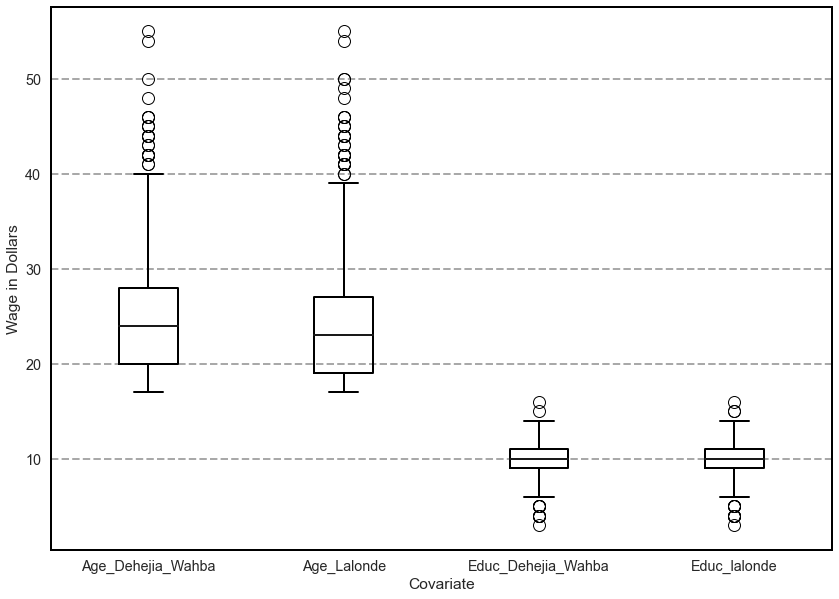

In [124]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.set_facecolor('white')
# Set boarder colour 
for spine in ax.spines:
    ax.spines[spine].set_color('black')
    ax.spines[spine].set_linewidth(2)

ax.grid(color='darkgrey', axis='y', linestyle='--', linewidth=2, alpha=1)

# Cusotmise median line 
medianprops = dict(linestyle='-', linewidth = 2, color='k')
boxprops = dict(linewidth = 2)
whiskerprops = dict(linewidth = 2)
capprops = dict(linewidth = 2)

flierprops = {'marker': 'o', 'markersize': 12,'linewidth':2}

Age_dej = nswre74['age']
Educ_dej = nswre74['education']

Age_lalonde = nsw['age']
Educ_lalonde = nsw['education']

ax.boxplot([Age_dej,Age_lalonde,Educ_dej,Educ_lalonde],
            medianprops=medianprops,
            boxprops = boxprops,
            whiskerprops=whiskerprops,
            capprops = capprops ,
            flierprops = flierprops,
            widths=0.3) 

#ax.set_xlim(0.5,5.5)
#ax.set_ylim(-2000,62000)

plt.xticks([1,2,3,4],['Age_Dehejia_Wahba', 'Age_Lalonde','Educ_Dehejia_Wahba','Educ_lalonde'])


ax.set_xlabel('Covariate')

ax.set_ylabel('Wage in Dollars')

plt.savefig('/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/Jupyter notebooks/lalonde_notebook_plots/fig2_age_educ_boxplots.png', bbox_inches='tight')

plt.show()



### Plot histograms comparing outcome from those with and without degrees

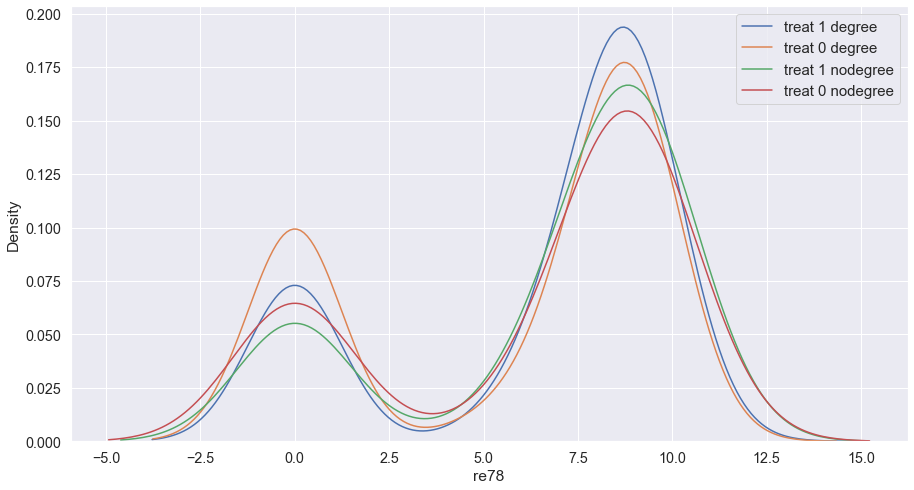

In [9]:
plt.figure(figsize=(15,8))
# Density plots for treatment and control
sns.kdeplot(data=nsw['re78'][(nsw['treat']==1) & (nsw['nodegree']==1)],label="treat 1 degree")
sns.kdeplot(data=nsw['re78'][(nsw['treat']==0) & (nsw['nodegree']==1)],label="treat 0 degree")
sns.kdeplot(data=nsw['re78'][(nsw['treat']==1) & (nsw['nodegree']==0)],label="treat 1 nodegree")
sns.kdeplot(data=nsw['re78'][(nsw['treat']==0) & (nsw['nodegree']==0)],label="treat 0 nodegree")
plt.legend(fontsize=15)

# Lalonde Observational study data

In [10]:
# (Dehejia-Wahba) subsetted sample of NSW dataset to include 1974 earnings 
nswre74_control = pd.read_excel('/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/nswre74_control.xls')
nswre74_treated = pd.read_excel('/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/nswre74_treated.xlsx')
#Combine treatment and control
nswre74 = pd.concat([nswre74_control,nswre74_treated])
nswre74['idx'] = range(1, len(nswre74) + 1)
#load non experimental data sets (psid and cps1)
# cps data
cps1 = pd.read_stata("/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/cps_controls.dta")
cps2 = pd.read_stata("/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/cps_controls2.dta")
cps3 = pd.read_stata("/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/cps_controls3.dta")

cps1.drop('data_id', axis=1, inplace=True)
cps2.drop('data_id', axis=1, inplace=True)
cps3.drop('data_id', axis=1, inplace=True)

cps1['idx'] = range(1, len(cps1) + 1)
cps2['idx'] = range(1, len(cps2) + 1)
cps3['idx'] = range(1, len(cps3) + 1)

psid1 = pd.read_stata("/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/psid_controls.dta")


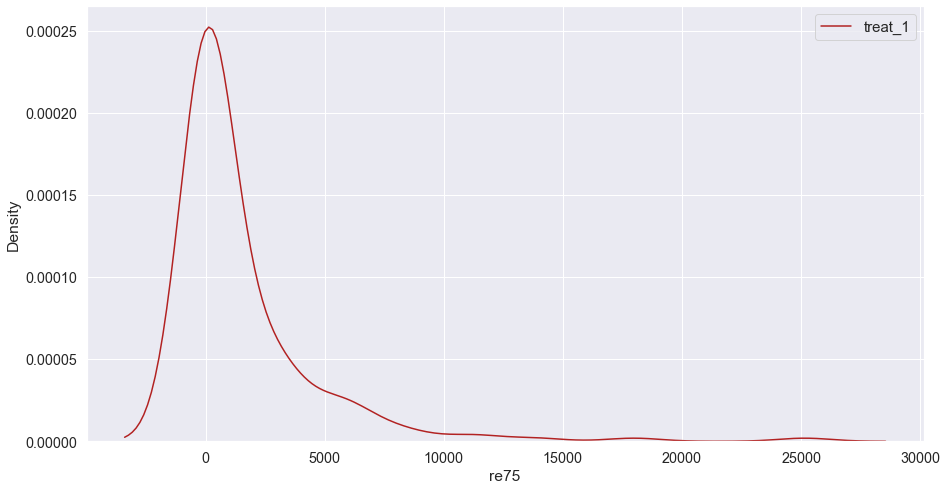

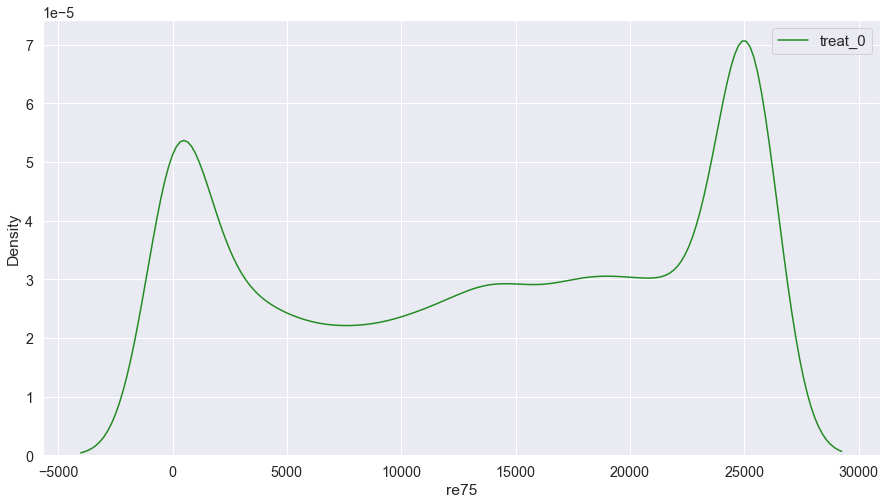

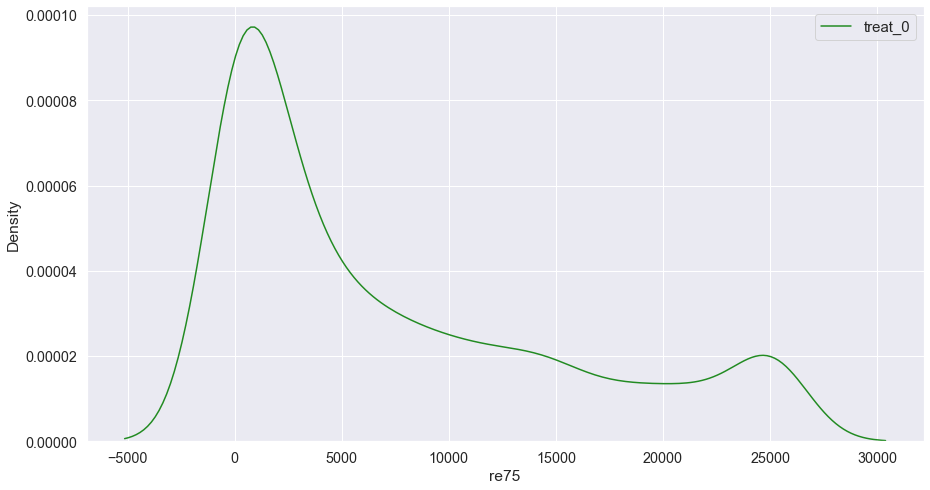

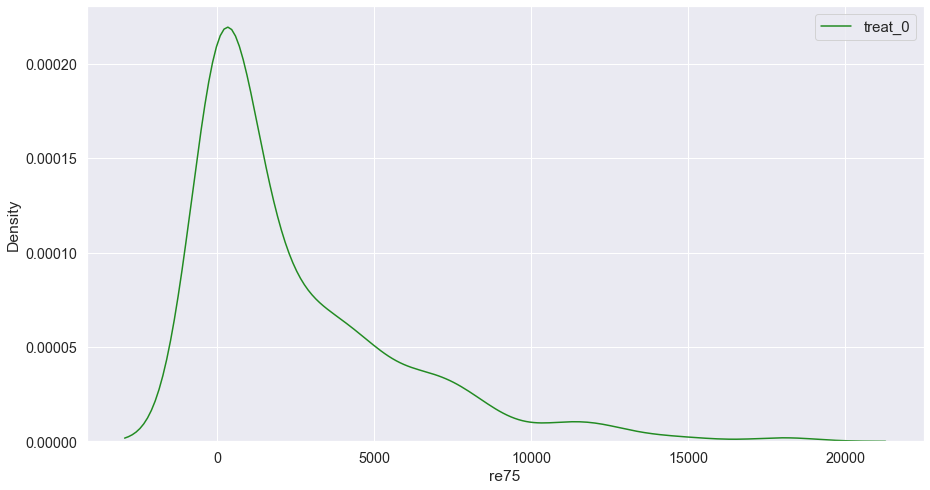

In [11]:
quick_plot(nswre74_treated,"re75",'treat')
quick_plot(cps1,"re75",'treat')
quick_plot(cps2,"re75",'treat')
quick_plot(cps3,"re75",'treat')

## Tabular statistics 

In [12]:
# Comparison groups 

cps1['index'] = range(1, len(cps1) + 1)
cps1_no_observations = sum(cps1['index'].value_counts())


# Current population Survey-social security
cps1['re74']
cps1['re75']
cps1['re78']

# Tabulate Mean and standard deviation of earnings for 1974 - 1975

mean_sd_earnings_74 = cps1['re74'].describe().loc[['mean','std']].T
mean_sd_earnings_75 = cps1['re75'].describe().loc[['mean','std']].T
mean_sd_earnings_78 = cps1['re78'].describe().loc[['mean','std']].T

cps1_earings_mean_sd= pd.concat([mean_sd_earnings_74,mean_sd_earnings_75,mean_sd_earnings_78],axis=1)
cps1_earings_mean_sd = cps1_earings_mean_sd.T

print(cps1_earings_mean_sd)

              mean          std
re74  14016.423828  9569.904297
re75  13650.932617  9270.392578
re78  14847.295898  9647.392578


## Create composite data sets
<p> Create different composite datasets for matching with the treatement group</p>

In [193]:
# Compose dataset of treated units from trial with units from cps1
nsw1_cps1_composite = pd.concat([nswre74_treated,cps1],axis=0)
nsw1_cps1_composite.drop('idx', axis=1, inplace=True)
nsw1_cps1_composite['idx'] = range(1, len(nsw1_cps1_composite) + 1)

# Compose dataset of treated units from trial with units from cps2
nswre74_cps2_composite = pd.concat([nswre74_treated,cps2],axis=0)
nswre74_cps2_composite.drop('idx', axis=1, inplace=True)
nswre74_cps2_composite['idx'] = range(1, len(nswre74_cps2_composite) + 1)

# Compose dataset of treated units from trial with units from cps3
nswre74_cps3_composite = pd.concat([nswre74_treated,cps3],axis=0)
nswre74_cps3_composite.drop('idx', axis=1, inplace=True)
nswre74_cps3_composite['idx'] = range(1, len(nswre74_cps3_composite) + 1)

In [13]:
import torch
from torch import nn
from torch.utils.data import  DataLoader,SubsetRandomSampler 
import torch.optim as optim # Optimization package
from sklearn.model_selection import KFold
from sklearn.utils import shuffle

# PS estimating and Matching methods

In [14]:
# reload datasets for estimation and matching 
nswre74_treated = pd.read_excel('/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/nswre74_treated.xlsx')
nswre74_treated.drop('treat', axis=1, inplace=True)

cps1 = pd.read_stata("/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/cps_controls.dta")

cps1.drop('data_id', axis=1, inplace=True)
cps1.drop('treat', axis=1, inplace=True)

### Matching 1 - Artifical Neural networks 

#### define ANN class 

In [15]:
class twoLayerNN(nn.Module):
    def __init__(self, num_features, num_classes, num_hidden_1, num_hidden_2):
        super(twoLayerNN, self).__init__() 
       
        self.input_layer =  nn.Linear(num_features,num_hidden_1)                        
        self.hidden_layer1 = nn.Linear(num_hidden_1,num_hidden_2)                          
        self.out_layer =  nn.Linear(num_hidden_2, num_classes) 

        # Activation functions
        self.relu_activation = nn.ReLU()    
        self.output_activation = nn.Sigmoid()
        #Drop out and batch normalisation 
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(num_hidden_1)
        self.batchnorm2 = nn.BatchNorm1d(num_hidden_2)

    # Forward propogation method
    def forward(self, inputs):
        x = self.relu_activation(self.input_layer(inputs))
        x = self.batchnorm1(x)
        x = self.relu_activation(self.hidden_layer1(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.output_activation(self.out_layer(x))
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [16]:
# Data preprocessing for ANN 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Rescale continous variables for CPS data set 
cps1[['age','education','re74','re75','re78']] = sc.fit_transform(cps1[['age','education','re74','re75','re78']])
# Rescale continous variables for NSW data set 
nswre74_treated[['age','education','re74','re75','re78']] = sc.fit_transform(nswre74_treated[['age','education','re74','re75','re78']])
# Convert features into tensors for ANN 
# CPS dataset 
features_df_cps = cps1
features_array_cps = np.array(features_df_cps)
FEATURES_cps = torch.tensor(features_array_cps)
#NSW dataset 
features_df_nsw = nswre74_treated
features_array_nsw = np.array(features_df_nsw)
FEATURES_nsw = torch.tensor(features_array_nsw)
FEATURES_nsw = FEATURES_nsw.float()


In [17]:
# Neural netowrk hyper paramaters 
NUM_FEATURES = FEATURES_cps.shape[1]
NUM_HIDDEN_1 = 500
NUM_HIDDEN_2 = 250
NUM_HIDDEN_3 = 50
NUM_HIDDEN_4 = 25 
NUM_HIDDEN_5 = 12            
NUM_CLASSES = 1
NUM_EPOCHS = 50
BATCH_SIZE = 256
LEARNING_RATE = 0.0001

In [18]:
# Load saved model
model = twoLayerNN(num_features = NUM_FEATURES,num_classes  = NUM_CLASSES, num_hidden_1 = NUM_HIDDEN_1,num_hidden_2 = NUM_HIDDEN_2)
model.load_state_dict(torch.load('/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/Jupyter notebooks/k_cross_ANN.pt'))

<All keys matched successfully>

In [19]:
# Predict propensity scores for CPS and NSW data 
with torch.no_grad():
    model.eval()
    prediction_cps = model(FEATURES_cps)
    prediction_nsw = model(FEATURES_nsw)

prediction_cps = pd.DataFrame(prediction_cps.float().numpy())
prediction_nsw = pd.DataFrame(prediction_nsw.float().numpy())    

In [20]:
# Append predicted PS to dataframes
nswre74_treated = pd.read_excel('/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/nswre74_treated.xlsx') 
cps1 = pd.read_stata("/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/cps_controls.dta")
cps1.drop('data_id', axis=1, inplace=True)

nsw_with_ps = pd.concat([nswre74_treated,prediction_nsw],axis=1)
cps_with_ps = pd.concat([cps1,prediction_cps],axis=1)

nsw_with_ps.rename(columns = {0:'propensity_score'}, inplace = True)
cps_with_ps.rename(columns = {0:'propensity_score'}, inplace = True)
# Calculate the logit of the propensity score
nsw_with_ps['propensity_logit'] = np.log(nsw_with_ps['propensity_score'] / (1-nsw_with_ps['propensity_score']))
cps_with_ps['propensity_logit'] = np.log(cps_with_ps['propensity_score'] / (1-cps_with_ps['propensity_score']))

# Combine two dataframes 
nsw_cps_with_ps  = pd.concat([nsw_with_ps,cps_with_ps],axis=0,ignore_index = True)
#nsw_cps_with_ps['id'] = range(1, len(nsw_cps_with_ps) + 1)

In [21]:
# Remove observations which lie outside min and max estimated propesnity scores 
#max = nsw_cps_with_ps[nsw_cps_with_ps['treat']==1]['propensity_score'].max()
#min = nsw_cps_with_ps[nsw_cps_with_ps['treat']==1]['propensity_score'].min()
#nsw_cps_with_ps = nsw_cps_with_ps.drop(nsw_cps_with_ps[(nsw_cps_with_ps['propensity_score'] > max) | (nsw_cps_with_ps['propensity_score'] < min)].index)
#nsw_cps_with_ps

(0.0, 0.1)

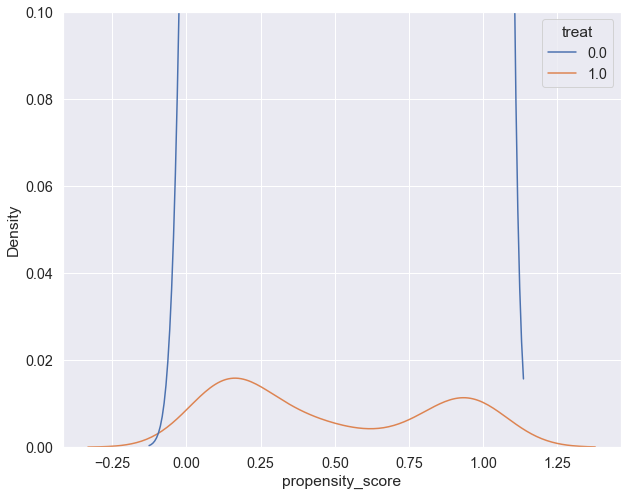

In [22]:
# Check overlap beteen groups
sns.kdeplot(data=nsw_cps_with_ps,x= 'propensity_score', hue= 'treat') 
plt.ylim(0,0.1)

### nearest-neighbour matching

In [44]:
from sklearn.neighbors import NearestNeighbors

caliper = np.std(nsw_cps_with_ps.propensity_score) * 0.25
print(f'caliper (radius) is: {caliper:.4f}')

n_neighbors = 20
# knn setup 
knn = NearestNeighbors(n_neighbors=n_neighbors, radius=caliper)
ps = nsw_cps_with_ps[['propensity_score']]  # double brackets as a dataframe
knn.fit(ps)

caliper (radius) is: 0.0788


NearestNeighbors(n_neighbors=20, radius=0.07882174849510193)

In [45]:
#Matching loop

# for each point in treatment, we find a matching point in control without replacement
# note the 10 neighbors may include both points in treatment and control
distances, neighbor_indexes = knn.kneighbors(ps)
matched_control = []  # keep track of the matched observations in control
neighbours = {} # store ID of matched neighbours to each control 
for current_index, row in nsw_cps_with_ps.iterrows():  # iterate over the dataframe
    if row.treat == 0:  # the current row is in the control group
        nsw_cps_with_ps.loc[current_index, 'matched'] = np.nan  # set matched to nan
    else: 
        for idx in neighbor_indexes[current_index]: # for each row in treatment, find the k neighbors
            # make sure the current row is not the idx - don't match to itself
            # and the neighbor is in the control 
            if (current_index != idx) and (nsw_cps_with_ps.loc[idx].treat == 0):
                #print(f'treatd id : {current_index} | 'f' matched neighbours : {neighbor_indexes[current_index]} ')
                if idx not in matched_control:  # this control has not been matched yet
                    nsw_cps_with_ps.loc[current_index,'matched'] = idx  # record the matching
                    matched_control.append(idx)  # add the matched to the list
                    neighbours[current_index] = neighbor_indexes[current_index]
                    break

In [46]:
print('total observations in treatment:', len(nsw_cps_with_ps[nsw_cps_with_ps.treat==1]))
print('total matched observations in control:', len(neighbours))

total observations in treatment: 185
total matched observations in control: 185


In [47]:
# Create control group for unit's in matched keys
matched_controls = []
for idx in neighbours.values():  # iterate over the dataframe
    for i in idx:
        matched_controls.append(nsw_cps_with_ps.iloc[i])

matched_controls = pd.DataFrame(matched_controls)
(matched_controls.treat == 0).sum(axis=0) # count number of matched control units 
matched_controls = matched_controls[matched_controls['treat']==0]
matched_controls.drop('matched',axis=1, inplace=True)
len(matched_controls)

3435

In [48]:
# generate dataframe with treated and matchd control units 
matched_df = pd.concat([nsw_with_ps,matched_controls])
len(matched_df)
#dataframe before matching for comparison 
before_matched_df = pd.concat([nswre74_treated,cps1])
matched_df = pd.concat([nsw_with_ps,matched_controls],ignore_index=True)
matched_df

,treat,age,education,black,hispanic,married,nodegree,re74,re75,re78,propensity_score,propensity_logit
0,1.0,37.0,11.0,1.0,0.0,1.0,1.0,0.000000,0.000000,9930.046000,0.196479,-1.408446
1,1.0,22.0,9.0,0.0,1.0,0.0,1.0,0.000000,0.000000,3595.894000,0.110948,-2.081095
2,1.0,30.0,12.0,1.0,0.0,0.0,0.0,0.000000,0.000000,24909.450000,0.999728,8.207772
3,1.0,27.0,11.0,1.0,0.0,0.0,1.0,0.000000,0.000000,7506.146000,0.108633,-2.104777
4,1.0,33.0,8.0,1.0,0.0,0.0,1.0,0.000000,0.000000,289.789900,0.130304,-1.898275
...,...,...,...,...,...,...,...,...,...,...,...,...
3615,0.0,40.0,16.0,0.0,0.0,1.0,0.0,25862.320312,25243.550781,25564.669922,0.993492,5.028167
3616,0.0,40.0,16.0,0.0,0.0,1.0,0.0,25862.320312,25243.550781,25564.669922,0.993492,5.028167
3617,0.0,40.0,16.0,0.0,0.0,1.0,0.0,25862.320312,25243.550781,25564.669922,0.993492,5.028167
3618,0.0,27.0,12.0,0.0,0.0,1.0,0.0,14812.059570,17670.480469,25564.669922,0.993490,5.027955


In [49]:
# sava dataset to a csv file 
matched_df.to_csv("/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/lalonde_synthetic_control.csv")

<p> test distributions</p>

<p> plot distribtions of key variables pre and post matching </p>

(-10000.0, 45000.0)

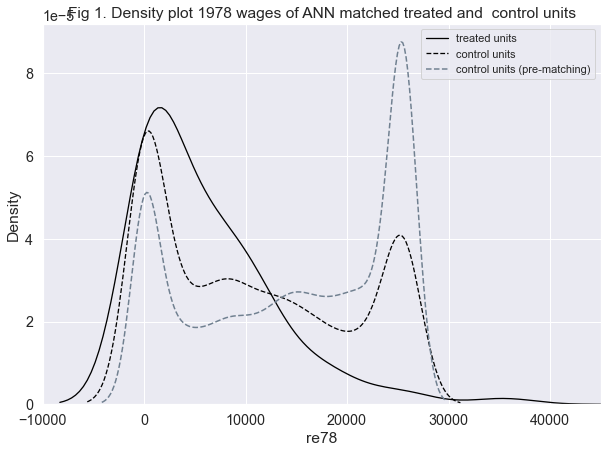

In [50]:
plt.figure(figsize=(10,7))
# Density plots post-matching
sns.kdeplot(matched_df['re78'][matched_df['treat']==1],color = 'black',linewidth=1.3,label = 'treated units')
sns.kdeplot(matched_df['re78'][matched_df['treat']==0],color = 'black',linewidth=1.3,linestyle = 'dashed',label = 'control units')
plt.title('Fig 1. Density plot 1978 wages of ANN matched treated and  control units')
# Density plots pre-matching
sns.kdeplot(before_matched_df['re78'][before_matched_df['treat']==0],color = 'slategrey',linewidth=1.5,linestyle = 'dashed',label = 'control units (pre-matching)')

plt.legend(fontsize=11,loc = 1)
plt.xlim([-10000, 45000])



(2.0, 21.0)

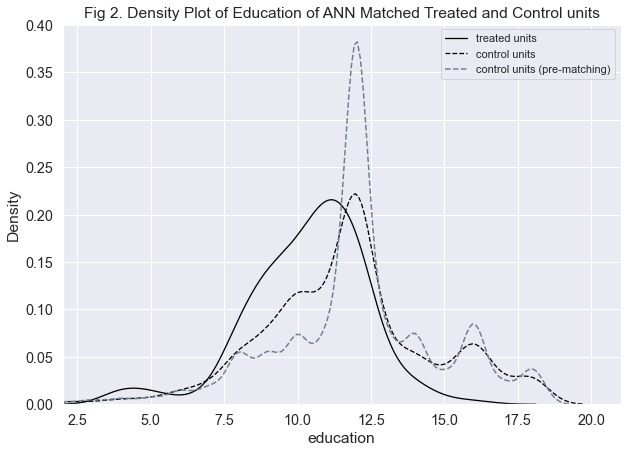

In [51]:
plt.figure(figsize=(10,7))
# Density plots post-matching
sns.kdeplot(matched_df['education'][matched_df['treat']==1],color = 'black',linewidth=1.3,label = 'treated units')
sns.kdeplot(matched_df['education'][matched_df['treat']==0],color = 'black',linewidth=1.3,linestyle = 'dashed',label = 'control units')
sns.kdeplot(before_matched_df['education'][before_matched_df['treat']==0],color = 'slategrey',linewidth=1.5,linestyle = 'dashed',label = 'control units (pre-matching)')
plt.title('Fig 2. Density Plot of Education of ANN Matched Treated and Control units')
plt.legend(fontsize=11,loc = 1)
plt.xlim([2, 21])

### Matching 2 - logistic regression